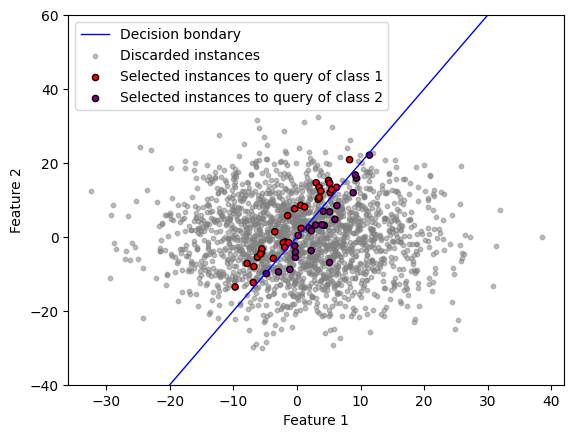

In [36]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.normal(0, 10, 2000)
y = np.random.normal(0, 10, 2000)

a, b = 2, 0
decision_boundary = lambda x: a * x + b

distances = np.abs(y - decision_boundary(x)) / np.sqrt(1 + a**2)

threshold = 4
near_boundary = distances < threshold


above_boundary = y > decision_boundary(x)
color1 = 'red'
color2 = 'purple'


x_vals = np.linspace(min(x), max(x), 100)
plt.plot(x_vals, decision_boundary(x_vals), color='blue', linewidth=1, label = 'Decision bondary')

plt.scatter(x, y, color='grey', alpha=0.5, s=10, label='Discarded instances')

highlight_indices = np.where(near_boundary)[0]
selected_indices = np.random.choice(highlight_indices, size=min(50, len(highlight_indices)), replace=False)
plt.scatter(x[selected_indices], y[selected_indices],
            color=[color1 if above_boundary[i] else color2 for i in selected_indices],
            s=20, edgecolor='black')

plt.scatter(x[1], y[1], color=color1,s=20, edgecolor = 'black' , label = 'Selected instances to query of class 1')

plt.scatter(x[0], y[0], color=color2,s=20, edgecolor = 'black' , label = 'Selected instances to query of class 2')

# Labels and show plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim((-40,60))
plt.legend()
plt.show()

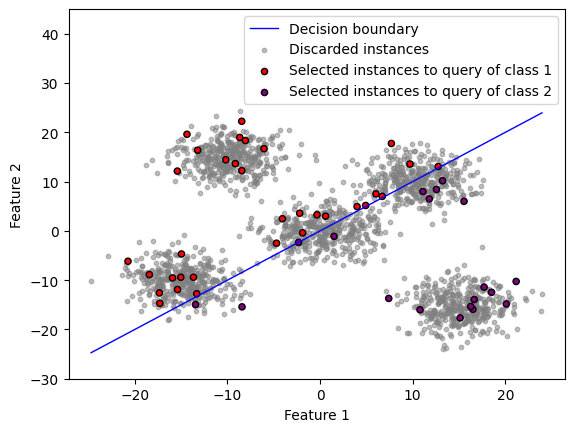

In [ ]:
np.random.seed(42)
cluster_centers = [(-15, -10), (10, 10), (-10, 15), (15, -15), (0, 0)]
n_points = 400  # Points per cluster
std_dev = 3  # Standard deviation of clusters

x, y = [], []
for cx, cy in cluster_centers:
    x_cluster = np.random.normal(cx, std_dev, n_points)
    y_cluster = np.random.normal(cy, std_dev, n_points)
    x.extend(x_cluster)
    y.extend(y_cluster)

x = np.array(x)
y = np.array(y)

a, b = 1, 0
decision_boundary = lambda x: a * x + b

plt.plot(x_vals, decision_boundary(x_vals), color='blue', linewidth=1, label = 'Decision boundary')

plt.scatter(x, y, color='grey', alpha=0.5, s=10, label = 'Discarded instances')

x_vals = np.linspace(min(x), max(x), 100)

above_boundary = y > decision_boundary(x)
color1 = 'red'
color2 = 'purple'

for i, (cx, cy) in enumerate(cluster_centers):
    cluster_mask = (np.abs(x - cx) < 3 * std_dev) & (np.abs(y - cy) < 3 * std_dev)
    cluster_indices = np.where(cluster_mask)[0]
    selected_indices = np.random.choice(cluster_indices, size=min(10, len(cluster_indices)), replace=False)
    plt.scatter(x[selected_indices], y[selected_indices],
                color=[color1 if above_boundary[i] else color2 for i in selected_indices], s=20, edgecolor='black')


plt.scatter(x[1], y[1], color=color1,s=20, edgecolor = 'black' , label = 'Selected instances to query of class 1')

plt.scatter(x[0], y[0], color=color2,s=20, edgecolor = 'black' , label = 'Selected instances to query of class 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim((-30,45))
plt.legend()
plt.show()


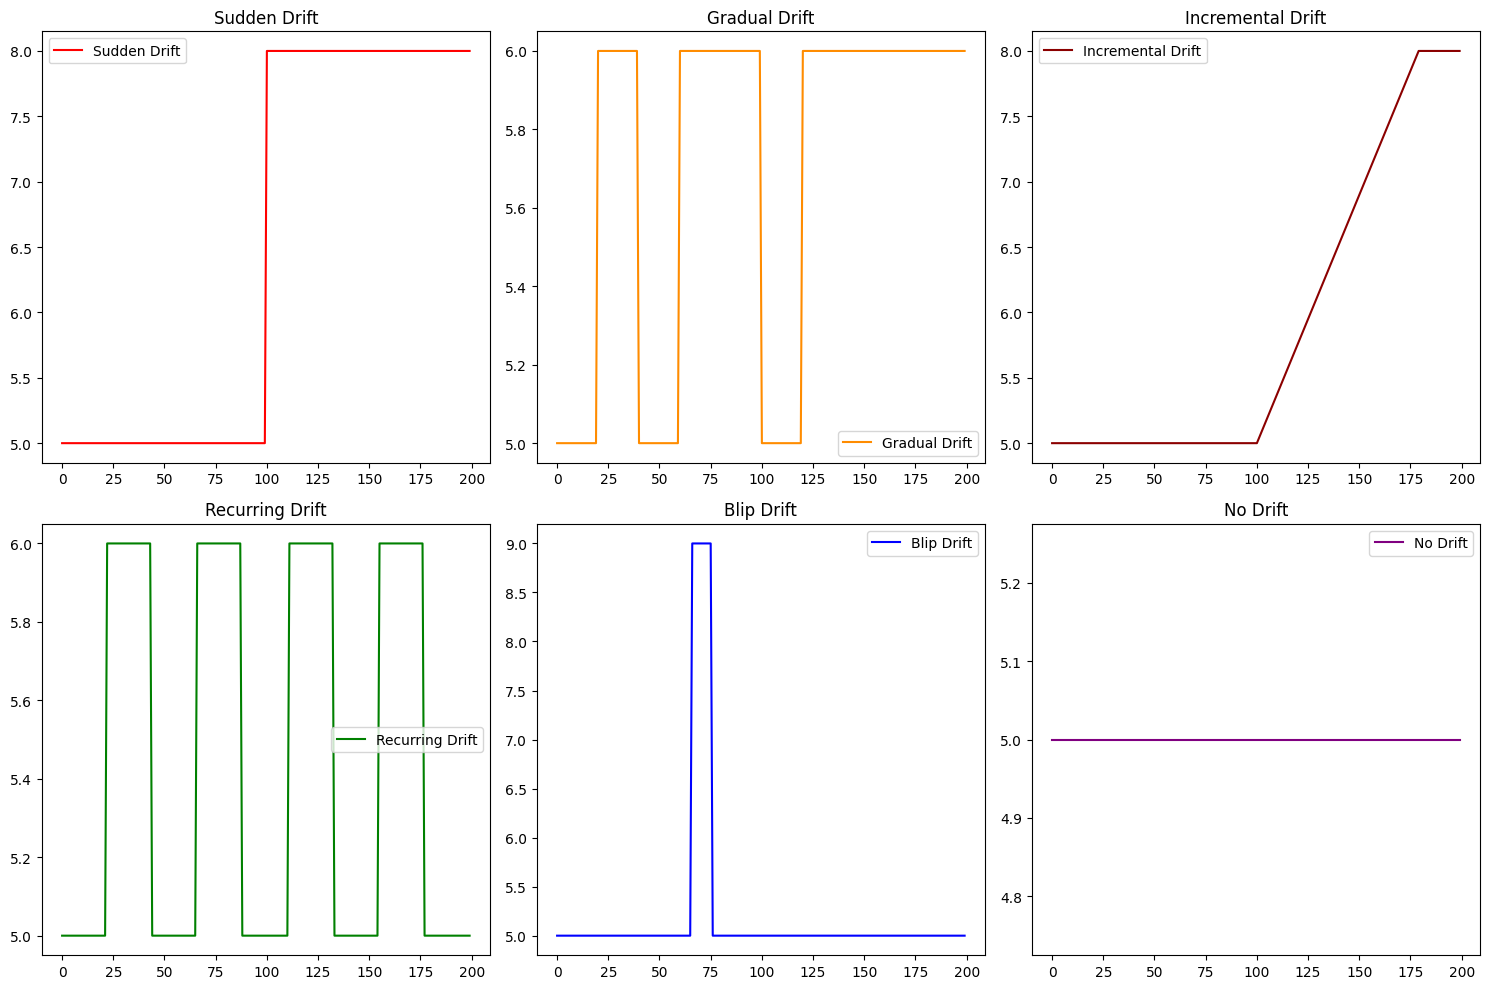

In [79]:
def generate_data(n, drift_type):
    np.random.seed(42)
    x = np.arange(n)
    y = np.ones(n) * 5

    if drift_type == "sudden":
        y[n//2:] = 8
    elif drift_type == "gradual":
        y[:n//10] = 5
        y[n//10:2*n//10] = 6
        y[2*n//10:3*n//10] = 5
        y[3*n//10:5*n//10] = 6
        y[5*n//10:6*n//10] = 5
        y[6*n//10:] = 6
    elif drift_type == "incremental":
        transition = np.linspace(5, 8, 4*n//10)
        y[n//2:9*n//10] = transition
        y[9*n//10:] = 8
    elif drift_type == "recurring":
        y[:n//9] = 5
        y[n//9:2*n//9] = 6
        y[2*n//9:3*n//9] = 5
        y[3*n//9:4*n//9] = 6
        y[4*n//9:5*n//9] = 5
        y[5*n//9:6*n//9] = 6
        y[6*n//9:7*n//9] = 5
        y[7*n//9:8*n//9] = 6
        y[8*n//9:] = 5
    elif drift_type == "blip":
        y[n//3:n//3 + 10] = 9
    elif drift_type == "no":
        pass

    return x, y

colors = ['red', 'darkorange', 'darkred', 'green', 'blue', 'purple']

def plot_drift(n=200):
    drift_types = ["sudden", "gradual", "incremental", "recurring", "blip", "no"]
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    for i, (ax, drift_type) in enumerate(zip(axes.flatten(), drift_types)):
        x, y = generate_data(n, drift_type)
        ax.plot(x, y, label=drift_type.capitalize() + " Drift", color=colors[i])
        ax.set_title(drift_type.capitalize() + " Drift")
        ax.legend()

    plt.tight_layout()
    plt.show()

plot_drift()